In [ ]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#df = pdr.DataReader('APPL ', data_source='yahoo', start='2012-01-01', end='2021-04-18')
#df

In [ ]:
df1 = pdr.DataReader("RELIANCE.NS", 
                       start='2015-1-1', 
                       end='2021-4-19', 
                       data_source='yahoo')



In [ ]:
df1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,441.812073,437.676270,438.988831,439.781311,1367720.0,420.596039
2015-01-02,443.818054,437.998199,439.880371,438.617340,3383424.0,419.482819
2015-01-05,441.267212,432.946106,438.344940,433.812897,4662967.0,414.888000
2015-01-06,432.401276,412.093750,430.915344,414.124512,8596809.0,396.058502
2015-01-07,425.367950,414.570282,414.619812,423.139069,9562421.0,404.679810
...,...,...,...,...,...,...
2021-04-12,1961.400024,1900.250000,1959.000000,1911.150024,9646031.0,1911.150024
2021-04-13,1940.599976,1917.849976,1924.000000,1931.800049,8958261.0,1931.800049
2021-04-15,1961.000000,1913.000000,1926.300049,1944.300049,9102492.0,1944.300049


In [ ]:
#url = 'C:/Users/aloks/Documents/Personal/Development/ML/Data Science/Predictin Stock Prices/Data/RELIANCE.csv'
#df1 = pd.read_csv(url)
#df1

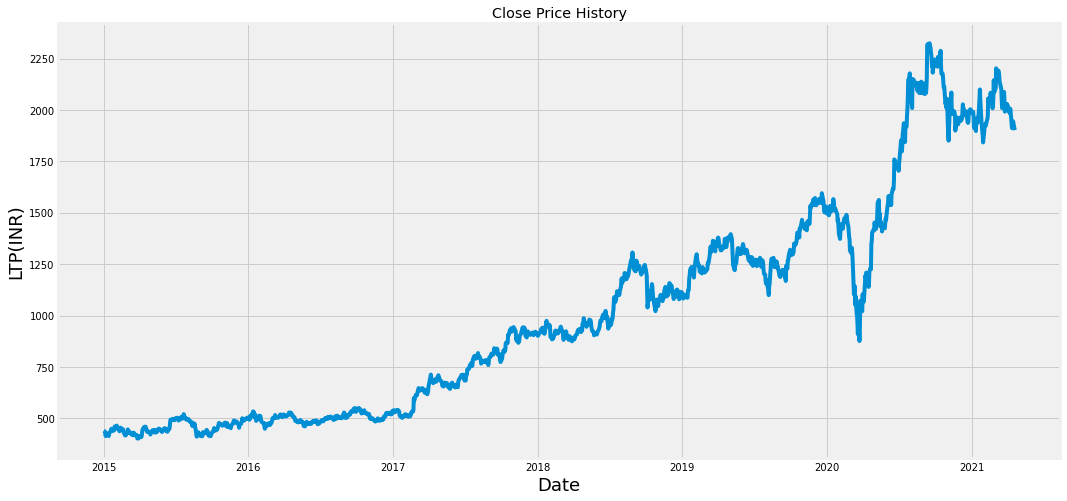

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df1['Close'])
plt.xlabel('Date', fontsize =18)
plt.ylabel('LTP(INR)', fontsize =18)
plt.show()

In [ ]:
#create a new data frame with close column

data = df1.filter(['Close'])

#convert dataframe to numpy array
dataset = data.values

In [ ]:
#get number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

1240

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01987163],
       [0.01926633],
       [0.0167679 ],
       ...,
       [0.80226019],
       [0.79591584],
       [0.78010704]])

In [ ]:
#create trainign data set
#create scaled training data set
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01987163, 0.01926633, 0.0167679 , 0.00652943, 0.01121723,
       0.00806197, 0.01276266, 0.01018694, 0.00834531, 0.00623322,
       0.01378006, 0.01518382, 0.01774666, 0.02377383, 0.02472684,
       0.01880271, 0.01961406, 0.02016784, 0.0247526 , 0.03056083,
       0.02691621, 0.0250617 , 0.03267293, 0.03040629, 0.02909269,
       0.02553819, 0.02213825, 0.01835195, 0.02316854, 0.02534502,
       0.02749575, 0.02370943, 0.02341324, 0.02351627, 0.01605957,
       0.01048315, 0.00790743, 0.00834531, 0.0080491 , 0.0115392 ,
       0.01378006, 0.0231943 , 0.01985876, 0.01911179, 0.01517095,
       0.01246645, 0.01164223, 0.01366415, 0.01013542, 0.00807486,
       0.01187404, 0.01491338, 0.01169374, 0.01116572, 0.00803621,
       0.00958164, 0.00879605, 0.00477794, 0.00024468, 0.        ])]
[0.0039279658887957924]

[array([0.01987163, 0.01926633, 0.0167679 , 0.00652943, 0.01121723,
       0.00806197, 0.01276266, 0.01018694, 0.00834531, 0.00623322,
       0.01378006, 0.01518382, 0.

In [ ]:
#convert x_train & y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train.shape

(1180, 60)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1180, 60, 1)

In [ ]:
#build model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train

model.fit(x_train, y_train, batch_size=1, epochs=1)

1180/1180 [==============================] - 27s 20ms/step - loss: 0.0033


In [ ]:
#create testing dataset
#create a new array containing scaled values from index 1180 to 1550

test_data = scaled_data[training_data_len - 60: , :]

#create the data sets x_test & y_test

x_test=[]
y_test = dataset[training_data_len: , :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data to a numpy array

x_test = np.array(x_test)
x_test.shape

(310, 60)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.51966311],
        [0.50845875],
        [0.53115084],
        ...,
        [0.57903334],
        [0.57617427],
        [0.58341204]],

       [[0.50845875],
        [0.53115084],
        [0.52844629],
        ...,
        [0.57617427],
        [0.58341204],
        [0.6056147 ]],

       [[0.53115084],
        [0.52844629],
        [0.54691419],
        ...,
        [0.58341204],
        [0.6056147 ],
        [0.58055304]],

       ...,

       [[0.81073657],
        [0.79869796],
        [0.82287916],
        ...,
        [0.82189116],
        [0.78502132],
        [0.79575987]],

       [[0.79869796],
        [0.82287916],
        [0.83975404],
        ...,
        [0.78502132],
        [0.79575987],
        [0.80226019]],

       [[0.82287916],
        [0.83975404],
        [0.85967099],
        ...,
        [0.79575987],
        [0.80226019],
        [0.79591584]]])

In [ ]:
#Get teh model predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#get root mean square error(RMSE)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.342704526839718

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


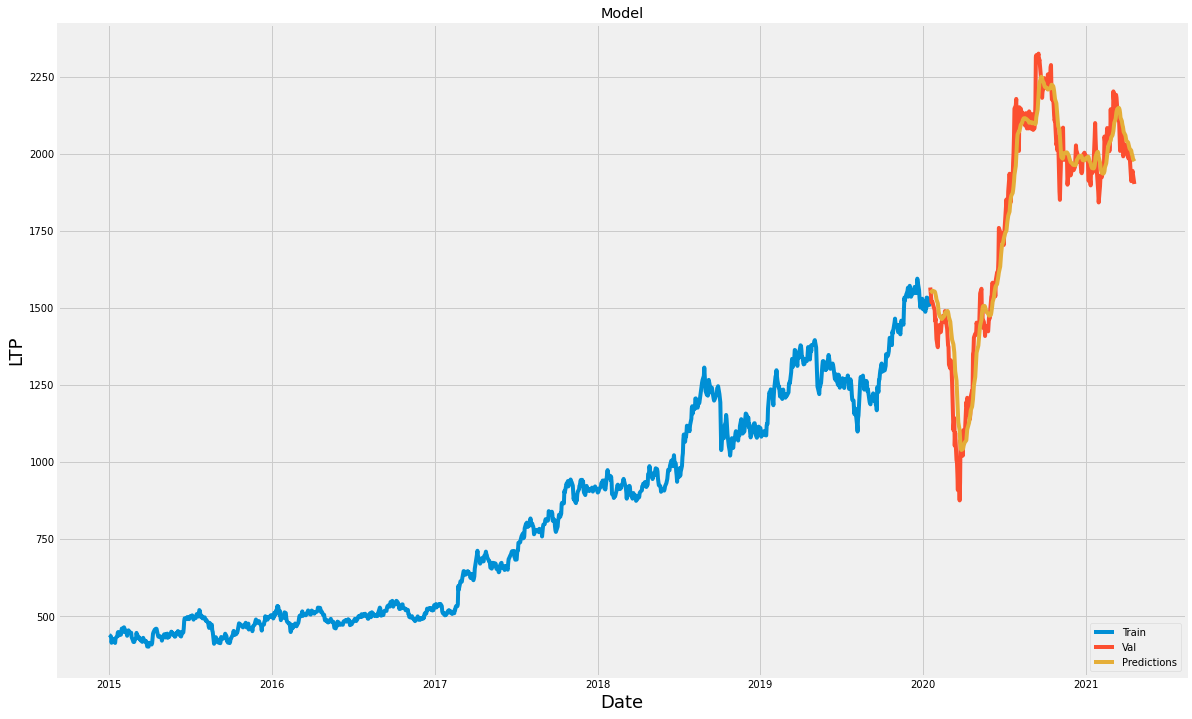

In [ ]:
#plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualise the data

plt.figure(figsize=(18,12))
plt.title('Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('LTP', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
#show the valid actual price & predicted price

valid

,Close,Predictions
Date,,
2020-01-17,1566.154419,1549.009766
2020-01-20,1517.961304,1552.929932
2020-01-21,1519.496704,1554.687988
2020-01-22,1518.951904,1555.471069
2020-01-23,1512.512939,1555.545044
...,...,...
2021-04-12,1911.150024,2010.862793
2021-04-13,1931.800049,2001.387573
2021-04-15,1944.300049,1991.750854


In [ ]:
#get the quote
reliance_quote = pdr.DataReader("RELIANCE.NS", start='2015-1-1', end='2021-4-15', data_source='yahoo')

#create a new data frame
new_df = reliance_quote.filter(['Close'])

#Get last 60 days closing price values and convert the dataframe to array
last60_days = new_df[-60:].values

#scale the data to be values between 0 & 1
last60_days_scaled = scaler.transform(last60_days)

#create empty list
X_test = []

#append
X_test.append(last60_days_scaled)

#convert X_test to numpy array
X_test = np.array(X_test)

#reshape to 3d
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#prediction
pred_price = model.predict(X_test)

#undo scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[1975.5201]]


In [ ]:
reliance_quote2 = pdr.DataReader("RELIANCE.NS", start='2021-4-15', end='2021-4-19', data_source='yahoo')
print(reliance_quote2['Close'])

Date
2021-04-15    1944.300049
2021-04-16    1932.099976
2021-04-19    1901.699951
Name: Close, dtype: float64
